# Introduction:

## Business problems:
* Created my own dataset by combining the scraped data (14,000 rows) from https://www.anime-planet.com/ and data from kaggle.com including over 4 thousand lines of animes information and over 3 million rating data(over 70 thousand users and over 4 thousand animes)
* Built my own database system and recommendation system
* Conducted an interface using HTML and WT Form and connected it with the database using Python Flask in Sublime Text
* Gave users some recommendation animes and some overview analysis

## Column Descriptions:

* anime_id: myanimelist.net's unique id identifying an anime
* title: full name of anime
* duration: run time of this anime, no data for serialize anime
* ongoing: whether this anime keeping update now
* starYr: the year when it release
* finishYr: the year when it finish
* sznOfRelease: the season when it release
* description: a text to summary this anime
* studios: which studio create
* contentWarn: some special warning
* watched: how many users marked watched
* watching: how many users marked watching
* wantWatch: how many users marked watching
* dropped: how many users marked watching and dropped later
* poster: a poster or an image link
* genre: comedy, action, etc.
* type: movie, TV, OVA, etc.
* episodes: how many episodes in this show. (1 if movie)
* rating: average rating out of 10 for this anime.
* members: number of community members that are in this anime's

# Data Scraping

## Import libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# Web scraper function:
# Parameters: URL: a website page to scrap data; pages: how many pages to scrap
# Return: a title list and a image link list
def scraper(URL, pages):
# If the pages is above 0, will scrap this page
    if pages > 0:
        page = requests.get(URL)
        soup = BeautifulSoup(page.content, 'html.parser')
        results = soup.find(id='siteContainer')
        animes_elems = results.find_all('li', class_='card')
        for anime in animes_elems:
            title = anime.find('h3', class_='cardName') # Get the title for every anime
            title = title.text.strip()
            title_list.append(title) 
            image = anime.find('img')['data-src'] # Get the image post-link for every anime
            image = 'https://www.anime-planet.com/'+image
            image_list.append(image)
# To get a post link for next page
        pages_container = results.find('li', class_="next")
        next_page = pages_container.find('a')['href']
        URL = URL[:44]+next_page[16:]
# Finish scrap current page and the pages minus one 
        pages -= 1
# Call the scraper function again and scrap next page
        scraper(URL, pages)

In [3]:
URL = 'https://www.anime-planet.com/anime/all?page=1'
title_list = []
image_list = []
scraper(URL, 400) # Scrape 400 pages

In [4]:
df = pd.DataFrame({'title': title_list, 'imageLink':image_list})
df.shape

(14000, 2)

In [5]:
# Double check any missing values 
df.isna().sum()

title        0
imageLink    0
dtype: int64

In [6]:
df.to_csv("/Users/jrchen/flatiron-ds-course/Milestones/capstone/rawData/imageLink.csv")

# Data Cleaning

## Import libraries and dataset

In [1]:
import pandas as pd

In [2]:
df_info = pd.read_csv('rawData/anime_new.csv')

In [3]:
df_image = pd.read_csv('rawData/imageLink.csv', index_col=0)

In [4]:
df_anime = pd.read_csv('rawData/anime.csv')

In [5]:
df_rating = pd.read_csv('rawData/rating.csv')

## Preview dataset

In [6]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14578 non-null  object 
 1   mediaType     14510 non-null  object 
 2   eps           14219 non-null  float64
 3   duration      9137 non-null   float64
 4   ongoing       14578 non-null  bool   
 5   startYr       14356 non-null  float64
 6   finishYr      14134 non-null  float64
 7   sznOfRelease  3767 non-null   object 
 8   description   8173 non-null   object 
 9   studios       14578 non-null  object 
 10  tags          14578 non-null  object 
 11  contentWarn   14578 non-null  object 
 12  watched       14356 non-null  float64
 13  watching      14578 non-null  int64  
 14  wantWatch     14578 non-null  int64  
 15  dropped       14578 non-null  int64  
 16  rating        12107 non-null  float64
 17  votes         12119 non-null  float64
dtypes: bool(1), float64(7), in

In [7]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      14000 non-null  object
 1   imageLink  14000 non-null  object
dtypes: object(2)
memory usage: 328.1+ KB


In [8]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## Merging Data

In [9]:
df_basic = df_info.set_index('title').join(df_image.set_index('title'), how='inner')

In [10]:
df_final = df_basic.drop(columns=['mediaType', 'eps', 'tags', 'rating', 'votes']).join(df_anime.set_index('name'), how='inner')

In [11]:
# This dataset for recommendation system
df_final.shape

(4382, 19)

## Cleaning Data

In [12]:
df_final.head()

,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,anime_id,genre,type,episodes,rating,members
.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,2928,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
.hack//G.U. Trilogy,93.0,False,2008.0,2008.0,NaN,The World is an ordinary online game – or at l...,['CyberConnect2 sai'],[],5684.0,86,3440,64,https://www.anime-planet.com//images/anime/cov...,3269,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
.hack//Quantum,NaN,False,2010.0,2011.0,NaN,"Tobias, Mary, and Sakuya are way into the The ...",['Kinema Citrus'],[],4751.0,218,2489,64,https://www.anime-planet.com//images/anime/cov...,9332,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163
.hack//Roots,24.0,False,2006.0,2006.0,Spring,Years after the fantasy MMORPG known as 'The W...,['BEE TRAIN'],[],10615.0,572,4250,716,https://www.anime-planet.com//images/anime/cov...,873,"Adventure, Drama, Fantasy, Game, Sci-Fi",TV,26,7.06,50480
.hack//Versus: The Thanatos Report,21.0,False,2012.0,2012.0,NaN,NaN,[],[],695.0,20,622,10,https://www.anime-planet.com//inc/img/blank_ma...,15219,"Action, Game, Sci-Fi",Special,1,6.51,4474


In [13]:
# Check the indexes whether unique
df_final.index.duplicated().sum()

0

In [14]:
# Check the na values percnetage for every column
df_final.isna().sum()/df_final.shape[0]

duration        0.420812
ongoing         0.000000
startYr         0.001369
finishYr        0.006390
sznOfRelease    0.696942
description     0.383843
studios         0.000000
contentWarn     0.000000
watched         0.005021
watching        0.000000
wantWatch       0.000000
dropped         0.000000
imageLink       0.000000
anime_id        0.000000
genre           0.007759
type            0.001826
episodes        0.000000
rating          0.015062
members         0.000000
dtype: float64

It shows that columns('duration', 'sznOfRelease', 'description') have high percentage of na values. However, these features(including 'startYr', 'finishYr', 'watched') are no important for the anime and I am only going to use them on the database. Therefore, I am going to keep them. 

For columns('genre' and 'type'), I am going to list all the na value into unknown. For 'rating' column, I am going to drop the row with na values because this is important and I will use this for my recommendation system.

In [16]:
# Drop rows with na rating values
df_final.drop(index=df_final[df_final['rating'].isna()].index, inplace=True)

In [17]:
# Replace na values by unknown in columns 'genre' and 'type'
df_final['genre'].fillna('unknown', inplace=True)
df_final['type'].fillna('unknown', inplace=True)

In [18]:
# Double check
df_final.isna().sum()/df_final.shape[0]

duration        0.415894
ongoing         0.000000
startYr         0.001158
finishYr        0.006256
sznOfRelease    0.702502
description     0.387627
studios         0.000000
contentWarn     0.000000
watched         0.005097
watching        0.000000
wantWatch       0.000000
dropped         0.000000
imageLink       0.000000
anime_id        0.000000
genre           0.000000
type            0.000000
episodes        0.000000
rating          0.000000
members         0.000000
dtype: float64

In [19]:
# Check if any erroneous values
df_final.describe()

,duration,startYr,finishYr,watched,watching,wantWatch,dropped,anime_id,rating,members
count,2521.000000,4311.000000,4289.000000,4294.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4.316000e+03
mean,24.426418,1999.939457,2000.299837,2920.919655,277.126274,1166.063948,186.960843,13671.937210,6.399099,2.146527e+04
std,29.237578,16.169700,16.142385,8999.946208,1767.489469,2588.845289,665.681223,11165.338846,1.039444,6.733431e+04
min,1.000000,1907.000000,1907.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.670000,2.000000e+01
25%,4.000000,1992.000000,1992.000000,32.000000,1.000000,31.000000,2.000000,3658.250000,5.780000,2.130000e+02
50%,11.000000,2006.000000,2006.000000,169.500000,7.000000,160.000000,9.000000,9980.000000,6.500000,1.121500e+03
75%,31.000000,2012.000000,2012.000000,1582.500000,72.000000,992.250000,63.000000,23367.500000,7.130000,1.042800e+04
max,160.000000,2019.000000,2019.000000,161567.000000,74537.000000,28541.000000,19481.000000,34519.000000,9.260000,1.013917e+06


In [20]:
df_final.reset_index(inplace=True)
df_final.set_index('anime_id', inplace=True)
df_final.rename(columns={'index':'title'}, inplace=True)

In [21]:
df_final.head()

,title,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,genre,type,episodes,rating,members
anime_id,,,,,,,,,,,,,,,,,,,
2928,.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
3269,.hack//G.U. Trilogy,93.0,False,2008.0,2008.0,NaN,The World is an ordinary online game – or at l...,['CyberConnect2 sai'],[],5684.0,86,3440,64,https://www.anime-planet.com//images/anime/cov...,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
9332,.hack//Quantum,NaN,False,2010.0,2011.0,NaN,"Tobias, Mary, and Sakuya are way into the The ...",['Kinema Citrus'],[],4751.0,218,2489,64,https://www.anime-planet.com//images/anime/cov...,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163
873,.hack//Roots,24.0,False,2006.0,2006.0,Spring,Years after the fantasy MMORPG known as 'The W...,['BEE TRAIN'],[],10615.0,572,4250,716,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Sci-Fi",TV,26,7.06,50480
15219,.hack//Versus: The Thanatos Report,21.0,False,2012.0,2012.0,NaN,NaN,[],[],695.0,20,622,10,https://www.anime-planet.com//inc/img/blank_ma...,"Action, Game, Sci-Fi",Special,1,6.51,4474


In [22]:
df_final.shape

(4316, 19)

In [24]:
df_final.to_csv("/Users/jrchen/flatiron-ds-course/Milestones/capstone/cleaningData/clean_basic.csv")

## Tuning Rating Dataset

In [25]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [26]:
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [27]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [28]:
# Create a new empty DataFrame to store rating info
df_rate = pd.DataFrame()

In [29]:
# Keeping add the valid anime_id rating info into the df_rate
for i in df_final.index:
    df_temp = df_rating.loc[df_rating['anime_id'] == i]
    df_rate = pd.concat([df_rate, df_temp])

In [30]:
df_rate.shape

(3175823, 3)

In [31]:
df_rate.head()

,user_id,anime_id,rating
10344,128,2928,8
12659,160,2928,8
22182,270,2928,-1
35333,392,2928,-1
38543,426,2928,-1


In [ ]:
df_rate.to_csv("/Users/jrchen/flatiron-ds-course/Milestones/capstone/cleaningData/clean_rating.csv")

# Plotting

## Import libraries and dataset

In [1]:
#import libraries
import numpy as np
from pandas import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jrchen/flatiron-ds-course/Milestones/capstone/cleaningData/clean_basic.csv')

## Preview dataset

In [3]:
df.head()

,anime_id,title,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,genre,type,episodes,rating,members
0,2928,.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
1,3269,.hack//G.U. Trilogy,93.0,False,2008.0,2008.0,NaN,The World is an ordinary online game – or at l...,['CyberConnect2 sai'],[],5684.0,86,3440,64,https://www.anime-planet.com//images/anime/cov...,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
2,9332,.hack//Quantum,NaN,False,2010.0,2011.0,NaN,"Tobias, Mary, and Sakuya are way into the The ...",['Kinema Citrus'],[],4751.0,218,2489,64,https://www.anime-planet.com//images/anime/cov...,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163
3,873,.hack//Roots,24.0,False,2006.0,2006.0,Spring,Years after the fantasy MMORPG known as 'The W...,['BEE TRAIN'],[],10615.0,572,4250,716,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Sci-Fi",TV,26,7.06,50480
4,15219,.hack//Versus: The Thanatos Report,21.0,False,2012.0,2012.0,NaN,NaN,[],[],695.0,20,622,10,https://www.anime-planet.com//inc/img/blank_ma...,"Action, Game, Sci-Fi",Special,1,6.51,4474


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      4316 non-null   int64  
 1   title         4316 non-null   object 
 2   duration      2521 non-null   float64
 3   ongoing       4316 non-null   bool   
 4   startYr       4311 non-null   float64
 5   finishYr      4289 non-null   float64
 6   sznOfRelease  1284 non-null   object 
 7   description   2643 non-null   object 
 8   studios       4316 non-null   object 
 9   contentWarn   4316 non-null   object 
 10  watched       4294 non-null   float64
 11  watching      4316 non-null   int64  
 12  wantWatch     4316 non-null   int64  
 13  dropped       4316 non-null   int64  
 14  imageLink     4316 non-null   object 
 15  genre         4316 non-null   object 
 16  type          4316 non-null   object 
 17  episodes      4316 non-null   object 
 18  rating        4316 non-null 

## Genre

In [5]:
# Create a list to store every genres
genre_list=[] 
for i in df['genre']:
    for n in i.split(','):
        if n.strip() not in genre_list:
            genre_list.append(n.strip())
genre_list.sort()

In [6]:
# Create an empty library to sotres and their numbers of animes
genre_dict = {}
for i in genre_list:
    genre_dict[i] = 0

In [7]:
# Check every anime's genre and assign them into the dictionary
for i in df['genre']:
    for n in i.split(','):
        for m in genre_dict.keys():
            if n.strip() == m:
                genre_dict[m] += 1

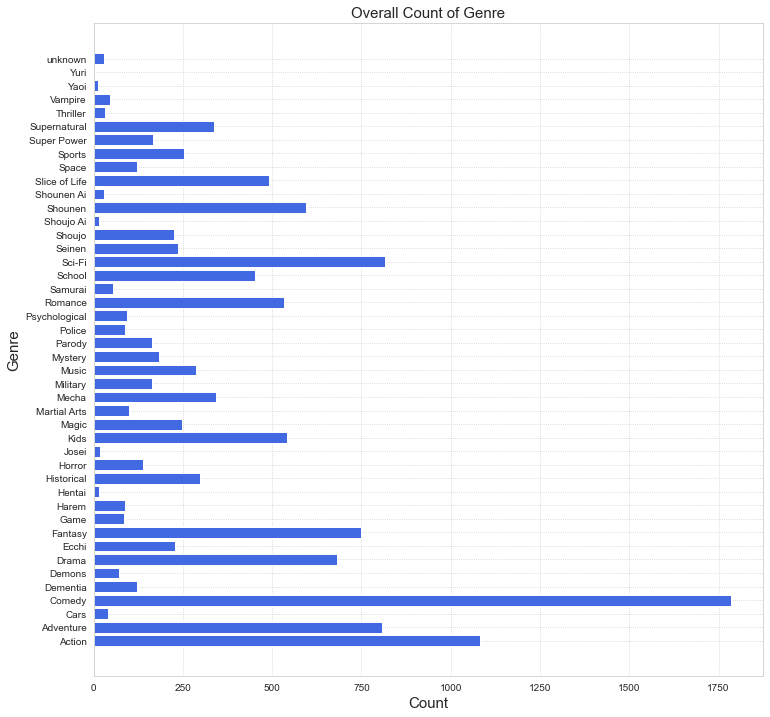

In [8]:
# Plot the genre and its counting
plt.figure(figsize=(12,12))
plt.barh(list(genre_dict.keys()), list(genre_dict.values()), color='royalblue')
plt.title('Overall Count of Genre', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.grid(ls='dotted')
plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/cat_genre.png'.format(i))

## Other features plotting

In [9]:
# Store the features into two groups(continuous and categorical)
# Continuous features will make into box-plot and distribution
# Categorical features will make into bar plot
continuous=['duration', 'watched', 'startYr', 'finishYr','watching', 
            'wantWatch', 'dropped', 'rating', 'members']
cat = ['ongoing', 'sznOfRelease',  'type']

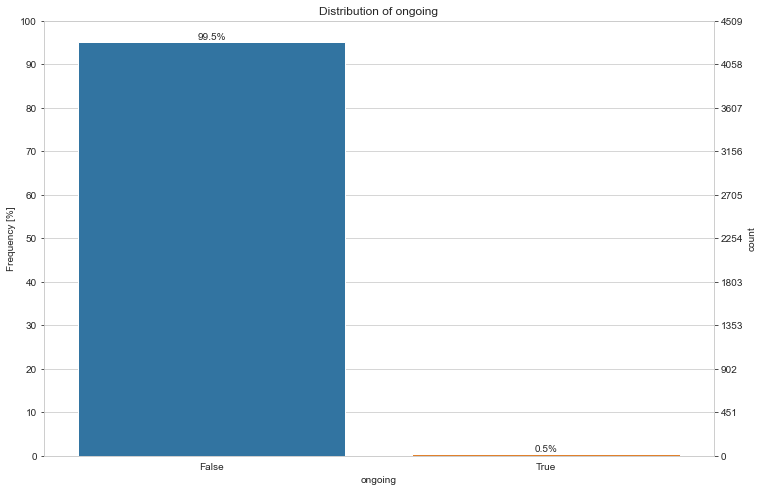

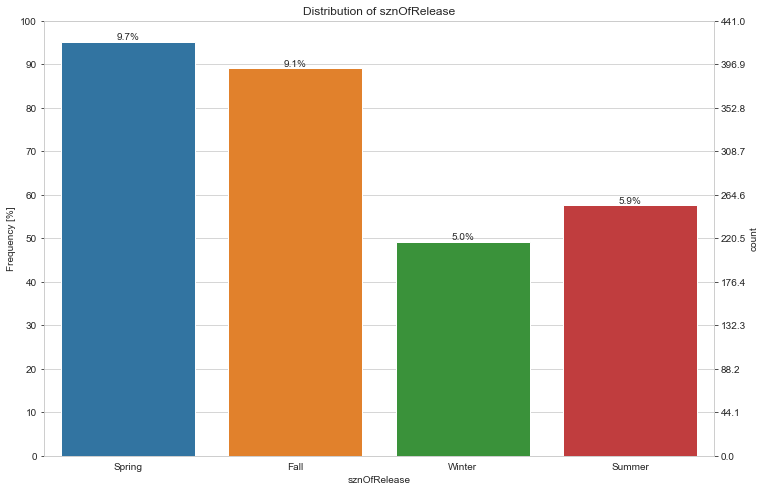

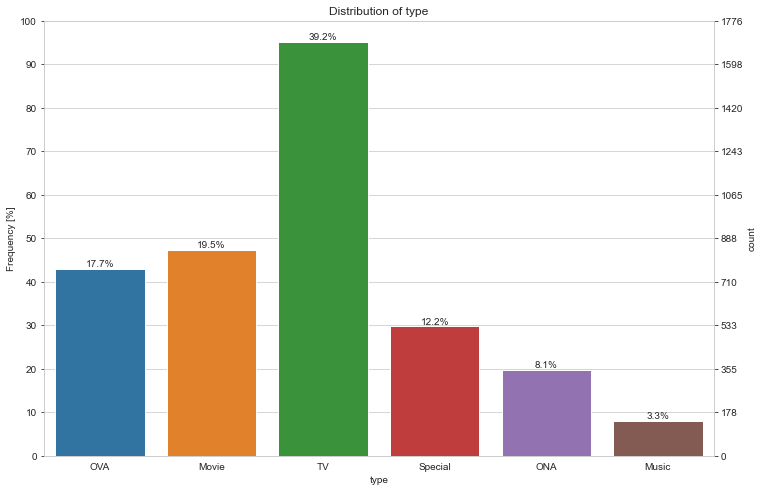

In [10]:
# A function to plot bar plot for each features in catergorical group
for i in cat:
    ncount = len(df)

    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=i, data=df)
    plt.title('Distribution of {}'.format(i))
    plt.xlabel(i)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    #ax.set_ylim(0,ncount)

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/cat_{}.png'.format(i))


Since I will add an red line for the exact value of an anime over all the animes in this database. Therefore, now I made up an example here.

In [11]:
# Make an example
anime = df.loc[df['anime_id']==2928]
anime

,anime_id,title,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,genre,type,episodes,rating,members
0,2928,.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412


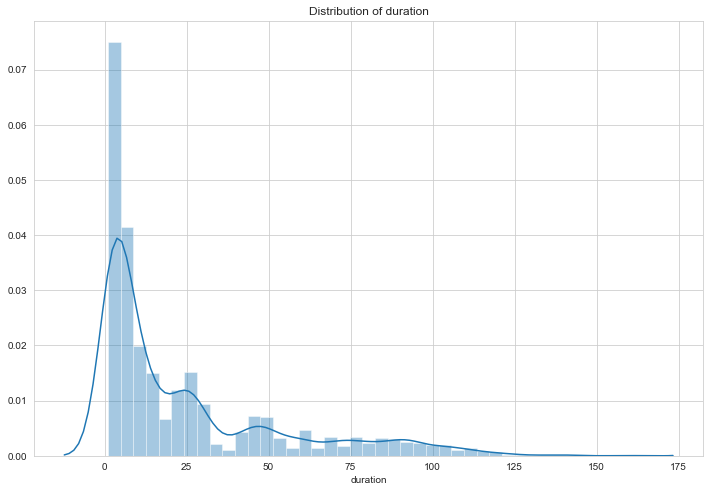

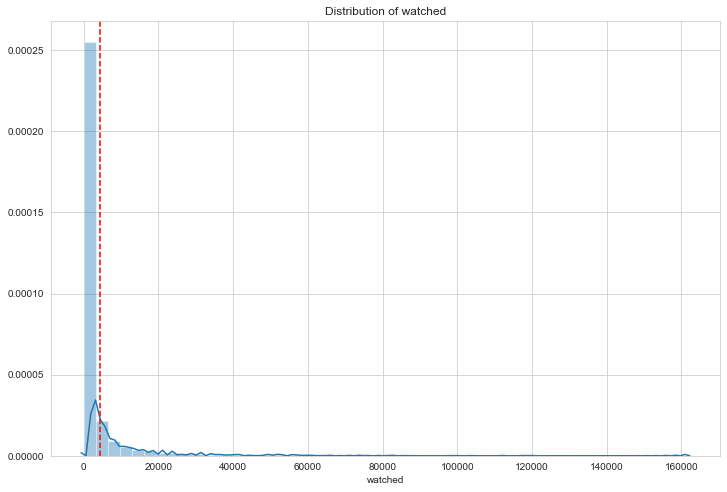

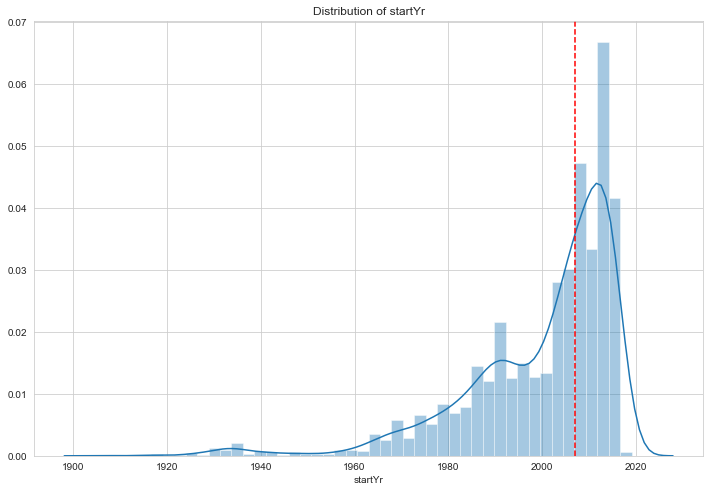

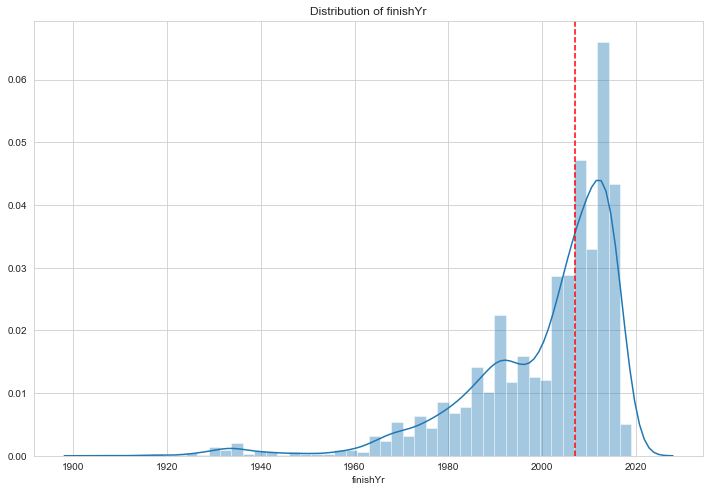

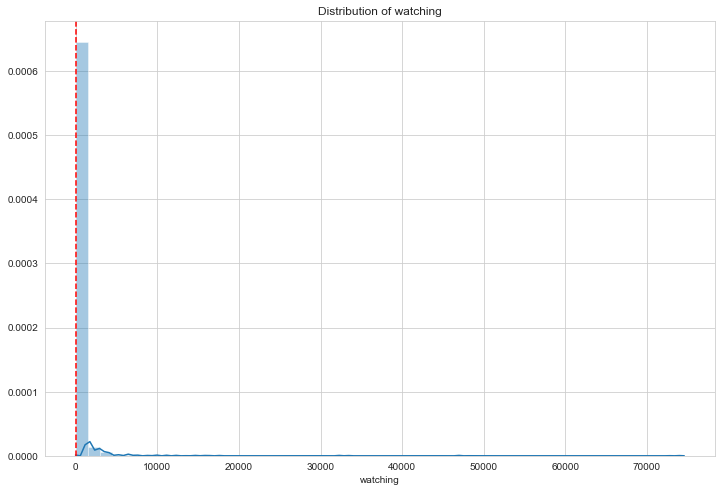

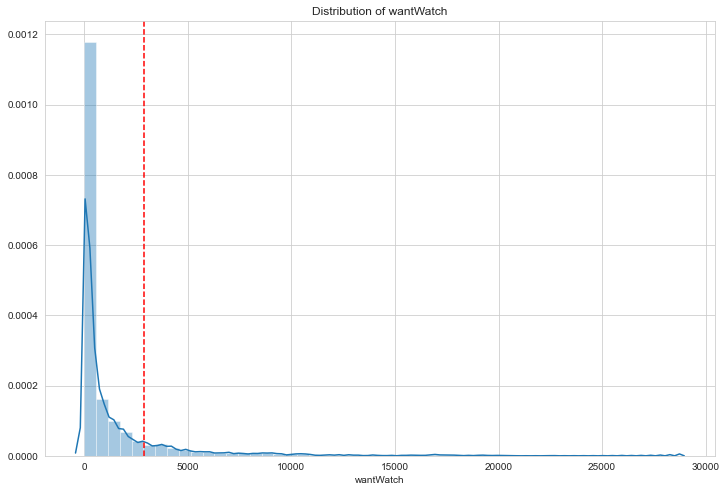

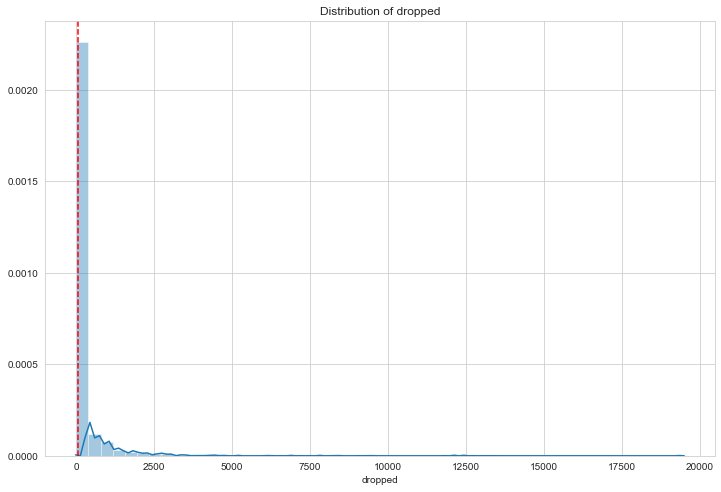

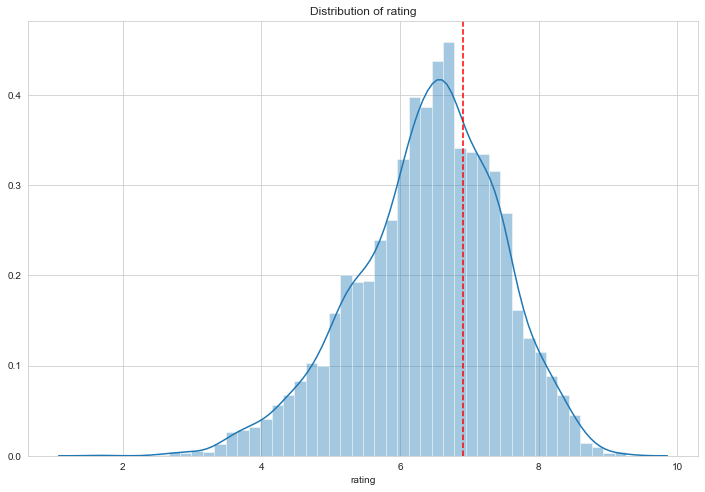

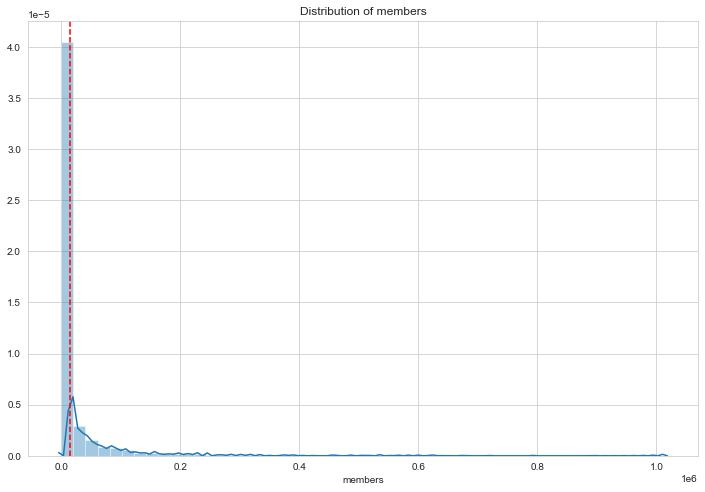

In [12]:
# A function to plot distribution for each features in continuous group
for i in continuous:
    plt.figure(figsize=(12,8))
    sns.distplot(df[i])
    plt.title('Distribution of {}'.format(i))
    try:
        plt.axvline(anime[i].values[0], ls='--', c='red')
    except:
        print('no data here') 
    plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/dist_{}.png'.format(i))

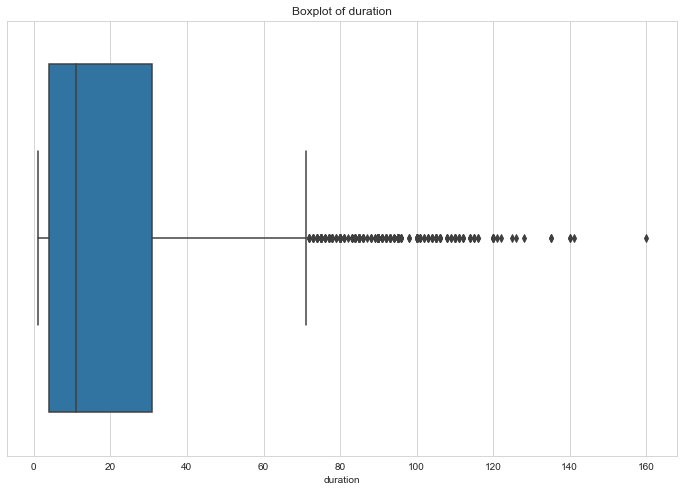

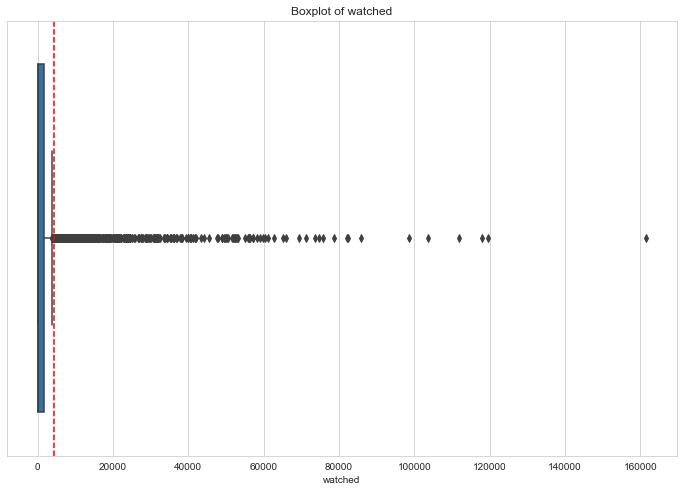

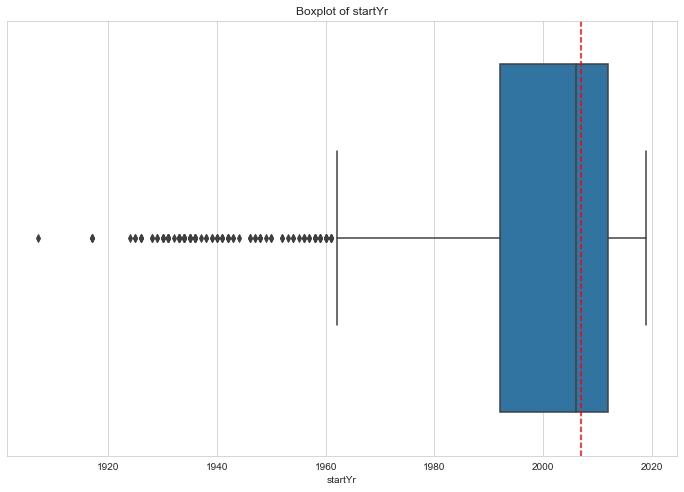

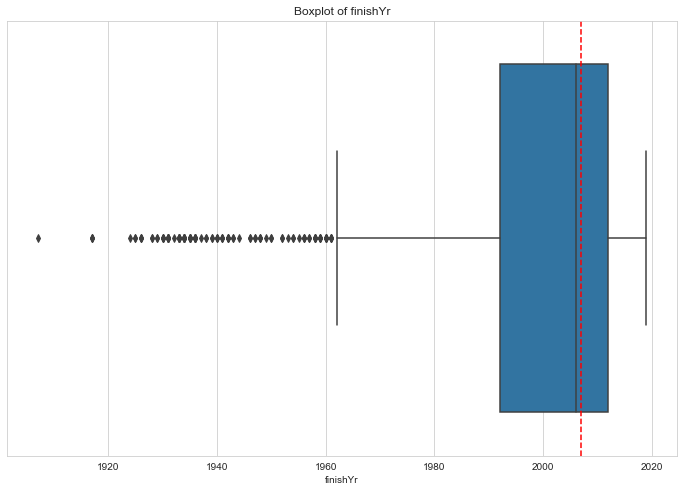

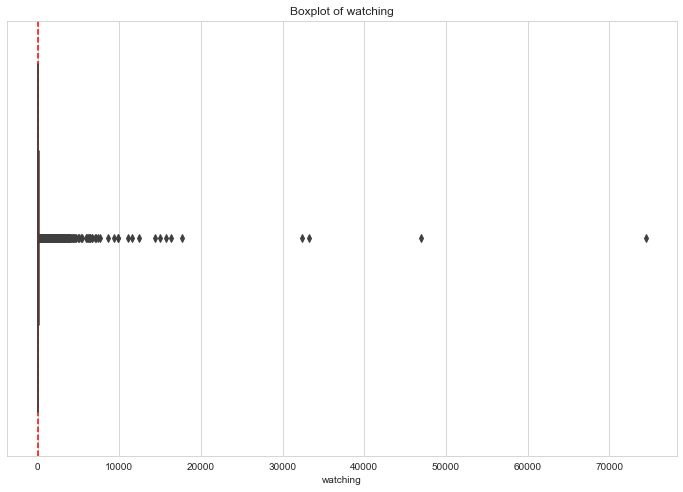

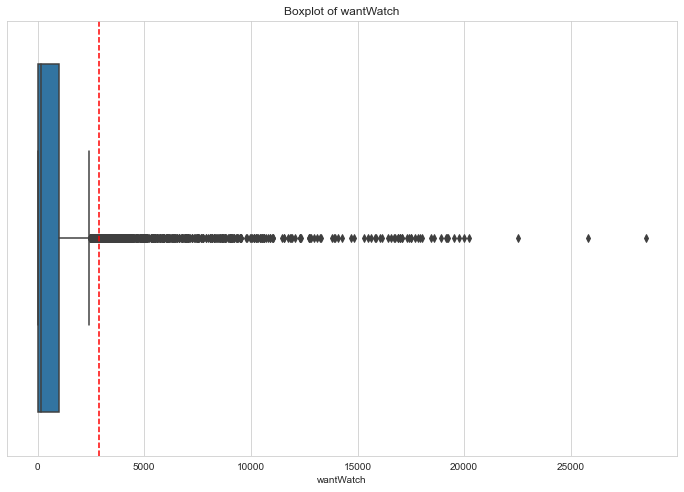

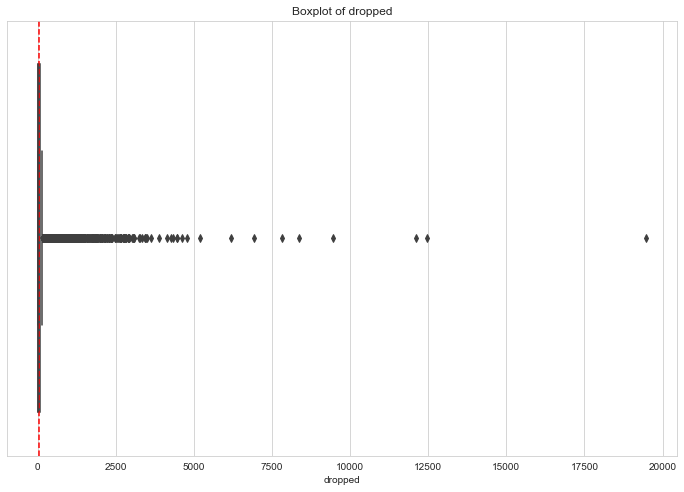

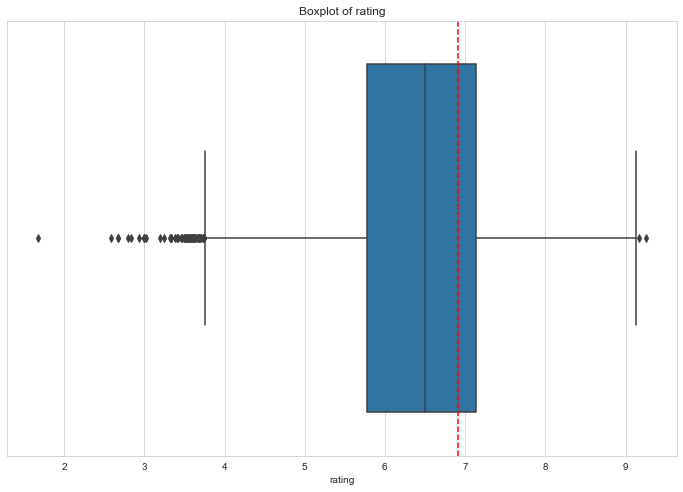

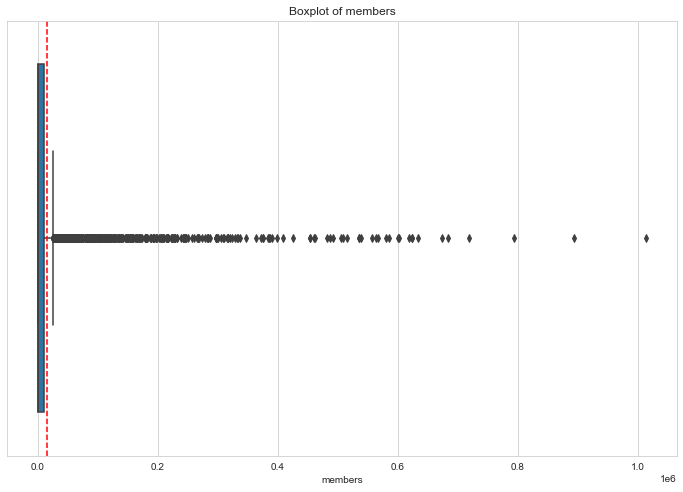

In [13]:
# A function to plot box-plot for each features in continuous group
for i in continuous:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[i])
    plt.title('Boxplot of {}'.format(i))
    try:
        plt.axvline(anime[i].values[0], ls='--', c='red')
    except:
        print('no data here')
    plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/dist_{}.png'.format(i))

# Algorithm Training

## Import libraries and dataset

In [1]:
# Importing relevant libraries
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

from surprise import accuracy

from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import RandomizedSearchCV, GridSearchCV

from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise.prediction_algorithms import SlopeOne, CoClustering
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline

In [2]:
ratings = pd.read_csv('cleaningData/clean_rating.csv', index_col=0)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3175823 entries, 10344 to 7813240
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 96.9 MB


## Preview dataset

In [3]:
print('No. of Unique Users    :', ratings['user_id'].nunique())
print('No. of Unique Animes    :', ratings['anime_id'].nunique())
print('No. of Unique Ratings  :', ratings['rating'].nunique())

No. of Unique Users    : 71753
No. of Unique Animes    : 4059
No. of Unique Ratings  : 11


In [4]:
ratings.describe()

,user_id,anime_id,rating
count,3.175823e+06,3.175823e+06,3.175823e+06
mean,3.680416e+04,8.161120e+03,6.281125e+00
std,2.104133e+04,8.768075e+03,3.678330e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.895100e+04,8.130000e+02,6.000000e+00
50%,3.699900e+04,5.112000e+03,8.000000e+00
75%,5.488300e+04,1.218900e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


## Transformation

In [5]:
# Transform the dataset into something compatible with surprise
from surprise import Reader, Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings,reader)

In [6]:
# Preview
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  71753 

Number of items:  4059


## Training

I made the test size 0.97 here which means train size is 0.03 because the dataset here is too large and took a very long time to train. Even train size is 0.03, it is not a small training dataset size in this database.

In [7]:
trainset, testset = train_test_split(data, test_size=.97)

In [8]:
# Create algorithem store the algorithms and two empty list to store rmse and mae
algorithm_list = [KNNBasic(), KNNBaseline(), KNNWithMeans(), SVD(), SVDpp(),
                 NMF(), SlopeOne(), CoClustering()]
rmse_list = []
mae_list = []

In [9]:
# For all the algorithms
for algorithm in algorithm_list:    
    # Define algorithm.
    algo = algorithm

    # Train the algorithm on the trainset, and predict ratings for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and append RMSE
    rmse_list.append(accuracy.rmse(predictions))

    # Compute and append MAE
    mae_list.append(accuracy.mae(predictions))
    
    # Del algorithm for more RAM
    del algo

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.7136
MAE:  2.6724
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.4129
MAE:  2.4743
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.9534
MAE:  2.1382
RMSE: 3.2764
MAE:  2.4705
RMSE: 3.3605
MAE:  2.5473
RMSE: 5.7344
MAE:  5.0916
RMSE: 3.0183
MAE:  2.2086
RMSE: 2.8542
MAE:  2.0404


In [14]:
# Create a dataframe for algorithm and their rmse and mae
algorithm_str = ['KNNBasic', 'KNNBaseline', 'KNNWithMeans', 'SVD', 'SVDpp',
                 'NMF', 'SlopeOne', 'CoClustering']
df_algorithm = pd.DataFrame(
    {'algorithm': algorithm_str, 'RMSE':rmse_list, 'MAE': mae_list})

In [15]:
df_algorithm

,algorithm,RMSE,MAE
0,KNNBasic,3.713634,2.672429
1,KNNBaseline,3.412892,2.474254
2,KNNWithMeans,2.953377,2.138220
3,SVD,3.276355,2.470511
4,SVDpp,3.360475,2.547291
5,NMF,5.734411,5.091614
6,SlopeOne,3.018283,2.208561
7,CoClustering,2.854187,2.040356


In [17]:
df_algorithm.to_csv(
    "/Users/jrchen/flatiron-ds-course/Milestones/capstone/cleaningData/algorithm.csv")

# Recommendation System

## Import libraries and dataset

In [1]:
# Importing relevant libraries
import requests
import io
import PIL.Image

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

from surprise import accuracy

from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import RandomizedSearchCV, GridSearchCV

from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise.prediction_algorithms import SlopeOne, CoClustering
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline

In [2]:
ratings = pd.read_csv('cleaningData/clean_rating.csv', index_col=0)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3175823 entries, 10344 to 7813240
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 96.9 MB


## Preview

In [3]:
print('No. of Unique Users    :', ratings['user_id'].nunique())
print('No. of Unique Animes    :', ratings['anime_id'].nunique())
print('No. of Unique Ratings  :', ratings['rating'].nunique())

No. of Unique Users    : 71753
No. of Unique Animes    : 4059
No. of Unique Ratings  : 11


In [4]:
# Transform the dataset into something compatible with surprise
from surprise import Reader, Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings,reader)

In [5]:
df_algorithm = pd.read_csv('cleaningData/algorithm.csv', index_col=0)
df_algorithm

,algorithm,RMSE,MAE
0,KNNBasic,3.713634,2.672429
1,KNNBaseline,3.412892,2.474254
2,KNNWithMeans,2.953377,2.138220
3,SVD,3.276355,2.470511
4,SVDpp,3.360475,2.547291
5,NMF,5.734411,5.091614
6,SlopeOne,3.018283,2.208561
7,CoClustering,2.854187,2.040356


CoClistering algorithm has the lowest RMSE(2.854187) and lowest MAE(2.040356). Therefore, I will choose this algorithm for this recommendation.

## Tune Hyperparameter

In [6]:
## Perform a gridsearch with CoClustering
params = {'n_cltr_u': [3, 5], 
        'n_cltr_i': [3, 5]}
g_s_svd = GridSearchCV(CoClustering, param_grid=params, cv=3, n_jobs=5)
g_s_svd.fit(data)

In [7]:
# Print out optimal parameters for CoClustering after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 2.2653224769114413, 'mae': 1.5773431047271262}
{'rmse': {'n_cltr_u': 3, 'n_cltr_i': 5}, 'mae': {'n_cltr_u': 3, 'n_cltr_i': 5}}


## Recommendation System

In [8]:
# Import animes data
animes = pd.read_csv('cleaningData/clean_basic.csv')
animes.head()

,anime_id,title,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,genre,type,episodes,rating,members
0,2928,.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
1,3269,.hack//G.U. Trilogy,93.0,False,2008.0,2008.0,NaN,The World is an ordinary online game – or at l...,['CyberConnect2 sai'],[],5684.0,86,3440,64,https://www.anime-planet.com//images/anime/cov...,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
2,9332,.hack//Quantum,NaN,False,2010.0,2011.0,NaN,"Tobias, Mary, and Sakuya are way into the The ...",['Kinema Citrus'],[],4751.0,218,2489,64,https://www.anime-planet.com//images/anime/cov...,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163
3,873,.hack//Roots,24.0,False,2006.0,2006.0,Spring,Years after the fantasy MMORPG known as 'The W...,['BEE TRAIN'],[],10615.0,572,4250,716,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Sci-Fi",TV,26,7.06,50480
4,15219,.hack//Versus: The Thanatos Report,21.0,False,2012.0,2012.0,NaN,NaN,[],[],695.0,20,622,10,https://www.anime-planet.com//inc/img/blank_ma...,"Action, Game, Sci-Fi",Special,1,6.51,4474


In [9]:
dataset = data.build_full_trainset()

In [10]:
# Apply our model
coc = CoClustering(n_cltr_u= 3, n_cltr_i=5)
coc.fit(dataset)

In [11]:
# An anime rater function for user to rate a random anime list
def anime_rater(anime_df, num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            anime = anime_df[anime_df['genre'].str.contains(genre)].sample(1)
        else:
            anime = anime_df.sample(1)
        print(anime[['anime_id', 'title']])
        response = requests.get(anime['imageLink'].values[0])
        image_bytes = io.BytesIO(response.content)
        img = PIL.Image.open(image_bytes)
        display(img)
        rating = input('How do you rate this anime on a scale of 10, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_anime = {
                'user_id':userID,'anime_id':anime['anime_id'].values[0],'rating':rating}
            rating_list.append(rating_one_anime) 
            num -= 1
    return rating_list



      anime_id             title
3442      8832  Shounen Ashibe 2


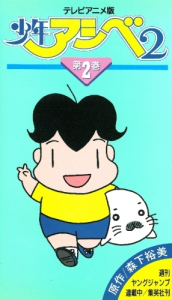

How do you rate this anime on a scale of 10, press n if you have not seen :
7
      anime_id                              title
1835      6297  Kamen Rider Den-O: Imagin Anime 2


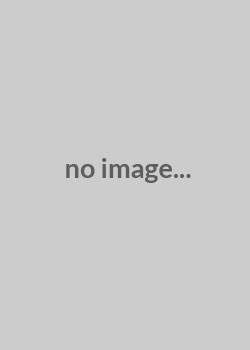

How do you rate this anime on a scale of 10, press n if you have not seen :
8
      anime_id   title
1788      7791  K-On!!


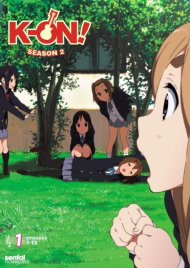

How do you rate this anime on a scale of 10, press n if you have not seen :
9
      anime_id           title
3227      1643  Sailor Victory


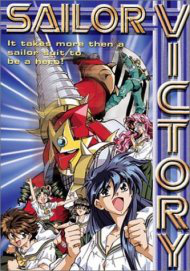

How do you rate this anime on a scale of 10, press n if you have not seen :
2


In [12]:
## Obtain user ratings
user_rating = anime_rater(animes, 4, 'Comedy')

## Prediction

In [14]:
## Add the new ratings to the original ratings DataFrame
new_ratings_df = ratings.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

In [15]:
# Apply our model
coc = CoClustering(n_cltr_u= 3, n_cltr_i=5)
coc.fit(dataset)

In [16]:
# Make predictions for the user
# Create a list of tuples in the format (anime_id, predicted_score)
list_of_animes = []
for m_id in ratings['anime_id'].unique():
    list_of_animes.append( (m_id, coc.predict(1000,m_id)[3]))

In [17]:
# Order the predictions from highest to lowest rated
ranked_animes = sorted(list_of_animes, key=lambda x:x[1], reverse=True)

Recommendation #  1 :  Choegang Top Plate 



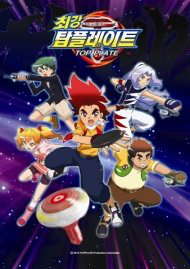

Recommendation #  2 :  Crayon Shin-chan Movie 24: Bakusui! Yumemi World Dai Totsugeki 



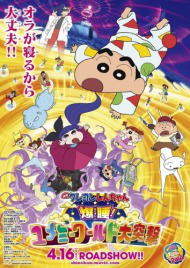

Recommendation #  3 :  Doukyuusei 



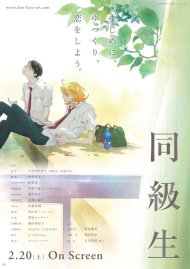

Recommendation #  4 :  Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai dayo!! 



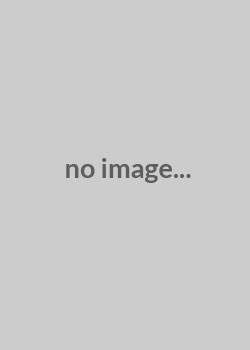

Recommendation #  5 :  Fullmetal Alchemist: Brotherhood 



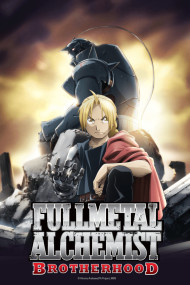

In [18]:
# Return the top n recommendations using the 
def recommended_animes(user_ratings, anime_title_df, n):
        for idx, rec in enumerate(user_ratings):
            title = anime_title_df.loc[anime_title_df['anime_id'] == int(rec[0])]['title'].values
            print('Recommendation # ', idx+1, ': ', title[0], '\n')
            image_link = animes.loc[anime_title_df['anime_id'] == int(rec[0])]['imageLink'].values[0]
            response = requests.get(image_link)
            image_bytes = io.BytesIO(response.content)
            img = PIL.Image.open(image_bytes)
            display(img)
            n-= 1
            if n == 0:
                break
            
recommended_animes(ranked_animes, animes, 5)

# Conclusion

* In the database system, I totally got three dataset. However, two of them are having a lot of repeated features. At last, I use the dataset from https://www.anime-planet.com/ as the basic one and added more features from the other dataset. Also, I scraped more features in this website and added into it.
* In the recommendation system, I had tried some algorithms(including KNNBasic(), KNNBaseline(), KNNWithMeans(), SVD(), SVDpp(), NMF(), SlopeOne(), CoClustering()) in this recommendation system. At last, CoClustering algorithm gave me a best outcome with RMSE 2.854178 and MAE 2.040356

# Recommendation

For users: 
* If you have no ideas which anime to watch, you can try Sort or recommendation features. Sort feature can filtrate you prefer scope or just sorting the animes by want watch variables and recommendation features will give you some recommendation animes basing on your rating of the survy animes. 
* If you have some ideas about what you want to watch, you can use search feature. Search animes by key words to see any other related animes

For analysts:
* To pass graphs and charts to the front desk, I found two methods. One is saving them on the local machine and supply the path to the front desk. The other one is encode them into base64.
* It is a pretty real case in our daily life. The training time is much longer than we excepted because of the huge dataset. I suggest than we can slightly dope down our training size base on the dataset size.

# Future Work

* Algorithm: Try more algorithms from other packages
* Hyper Parameter Tuning: tune more parameters of the models and use random search before grid search
* Exploratory Data Analysis: Exploratory more characteristics and more details in the analyze feature
* Interface: Learn more about the html or other tools to make the UI more nicer